In this notebook we will learn about encoding and decoding images in autoencoders. We will do so using the MNIST dataset of handwritten digits.

In [1]:
### In this cell, we import the necessary packages.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor

%matplotlib inline

In [2]:
### Set the number of images to display

num_images = 10

In [3]:
### Next, we set up the parameters of our model. Note that the 784 appears because the images will be 28-by-28 pixels.

# Encoder hidden layer node counts
encoder_1_node_count = 500
encoder_2_node_count = 300

# Latent layer node count
latent_node_count = 2

# Decoder hidden layer node counts
decoder_2_node_count = 300
decoder_1_node_count = 500

In [4]:
### Now we initialize the model where we measure the difference in the images on a pixel-by-pixel basis.
### We will end up training for 5 generations, but for now will only train 1 generation to see how
### bad an untrained fit is.

autoencoder = MLPRegressor(hidden_layer_sizes = (encoder_1_node_count,
                            encoder_2_node_count,
                            latent_node_count,
                            decoder_2_node_count,
                            decoder_1_node_count), 
                       activation = 'tanh', 
                       solver = 'adam', 
                       learning_rate_init = 0.0001, 
                       max_iter = 1, 
                       tol = 0.0000001, 
                       verbose = True) # means that training progress will be displayed

In [6]:
### Let's load the data. We normalize and reshape it to make it suitable for the model.

training_set = np.load('./mnist_train_images.npy')

validation_set = np.load('./mnist_test_images.npy')

In [7]:
### Display information about the loaded images

num_training = training_set.shape[0]
num_validation = validation_set.shape[0]

print ("{} training images found".format(num_training))
print ("{} validation images found".format(num_validation))

16583 training images found
2985 validation images found


In [8]:
### Create the initial processed images.

autoencoder.fit(training_set, training_set)
autoencoded_images = autoencoder.predict(training_set[:num_images].reshape(-1,784))

Iteration 1, loss = 0.03382501


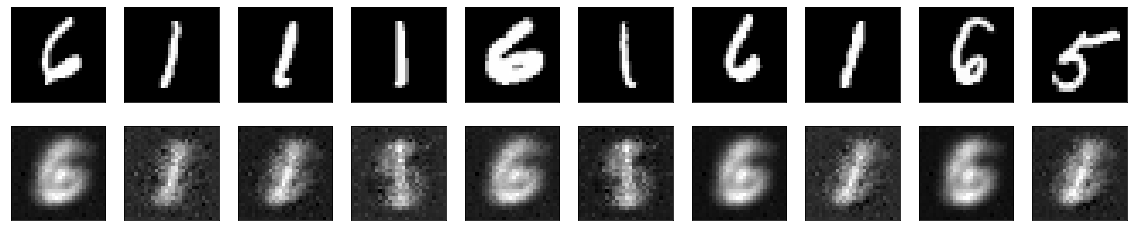

In [9]:
### Let's compare the original input images to the untrained autoencoded versions. Notice how they don't match.

plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Plot the original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(training_set[i].reshape(28, 28), 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Plot autoecoded version
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(autoencoded_images[i].reshape(28, 28), 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
### We can now train the model and update our autoencoded images by training another 4 generations.

for i in range(4):
    autoencoder.partial_fit(training_set, training_set)
autoencoded_images = autoencoder.predict(training_set[:num_images])

Iteration 2, loss = 0.02338618
Iteration 3, loss = 0.02236750
Iteration 4, loss = 0.02222462
Iteration 5, loss = 0.02215130


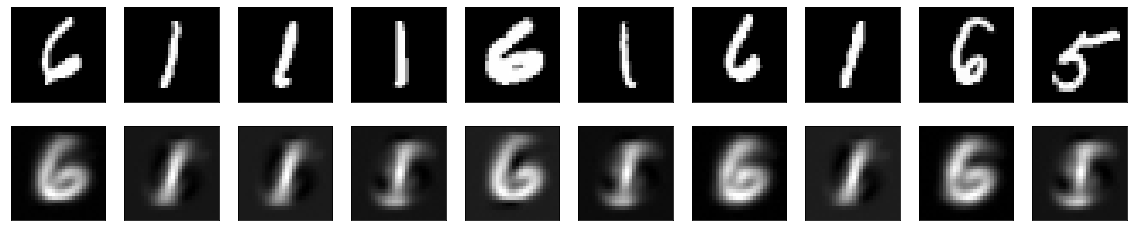

In [11]:
### Let's compare the original input images to the trained autoencoded versions. There's still work to
### be done but the images are certainly closer to what they should be. Consider how you might try to
### increase the accuracy of the model.

plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Plot the original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(training_set[i].reshape(28, 28), 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Plot autoecoded version
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(autoencoded_images[i].reshape(28, 28), 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()